# Predicting number in images using Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
print("Image shape", digits.data.shape)
print("Label shape", digits.target.shape)

Image shape (1797, 64)
Label shape (1797,)


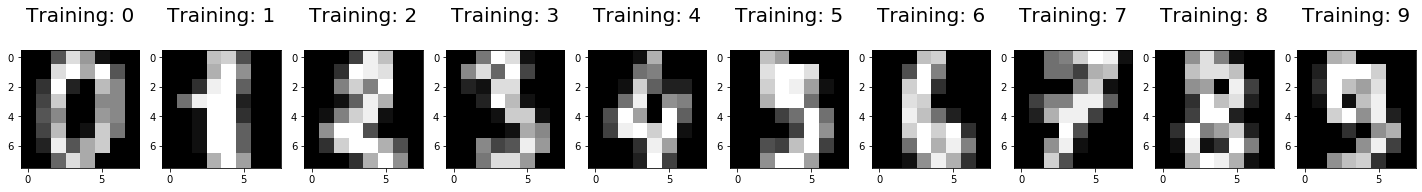

In [4]:
plt.figure(figsize=(25,5))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])) :
    plt.subplot(1 , 10 , index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap='gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
LR = LogisticRegression()
LR.fit(x_train, y_train)

C:\Users\CHANDRU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
print(LR.predict(x_test[2].reshape(1, -1)))

[3]


In [10]:
LR.predict(x_test[0:10])

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2])

In [11]:
y_pred = LR.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_pred,y_test)
print(Accuracy)

0.9733333333333334


In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  1  0  0  0  0  0]
 [ 0  1 38  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  0  1]
 [ 0  0  0  0 53  0  0  0  0  0]
 [ 0  0  0  1  0 57  1  0  1  0]
 [ 0  0  0  0  1  1 44  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  0  0  1  0  0  0  0 37  1]
 [ 0  0  0  0  0  1  0  1  0 46]]


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      0.97      0.97        37
           2       1.00      0.97      0.99        39
           3       0.96      0.98      0.97        45
           4       0.96      1.00      0.98        53
           5       0.97      0.95      0.96        60
           6       0.98      0.96      0.97        46
           7       0.98      1.00      0.99        40
           8       0.97      0.95      0.96        39
           9       0.96      0.96      0.96        48

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



Text(0.5, 1, 'Accuracy score:0.9733333333333334')

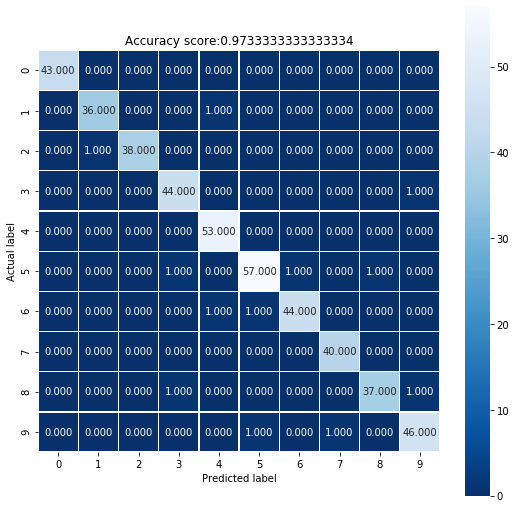

In [15]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, square=True, fmt=".3f", cmap='Blues_r', linewidths=.3)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy score:{0}'.format(Accuracy))

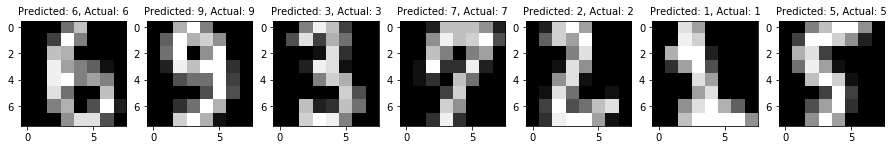

In [16]:
index=0
classifiedIndex = []
for predict , actual in zip(y_pred , y_test) :
    if predict==actual:
        classifiedIndex.append(index)
        index +=1
plt.figure(figsize=(20,3))
for plotIndex , wrong in enumerate (classifiedIndex[0:7]):
    plt.subplot(1, 9 , plotIndex + 1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)), cmap='gray')
    plt.title("Predicted: {}, Actual: {}".format(y_pred [wrong] , y_test[wrong]), fontsize = 10)